<a href="https://colab.research.google.com/github/yunjeong-chang/smarcle-winter-study/blob/main/CNN_MNIST_DATA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import numpy as np
import sys
import tensorflow as tf
import matplotlib.pyplot as plt
import os

seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [63]:
#MNIST 데이터 불러오기
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()
print("학습셋 이미지 수: %d개" %(X_train.shape[0]))
print("테스트셋 이미지 수: %d개" %(X_test.shape[0]))

학습셋 이미지 수: 60000개
테스트셋 이미지 수: 10000개


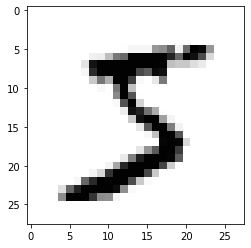

In [64]:
plt.imshow(X_train[0], cmap='Greys')

In [65]:
for x in X_train[0]:
  for i in x:
    sys.stdout.write('%d\t' %i)
  sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [66]:
#차원 변환 과정
X_train = X_train.reshape(X_train.shape[0], 784).astype('float64') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

print("class: %d" %(Y_class_train[0]))

class: 5


In [67]:
#바이너리화 과정
Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)
print(Y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [68]:
#모델 프레임 설정
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

#모델 실행 환경 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [69]:
#모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [70]:
#모델 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])


Epoch 00001: val_loss improved from inf to 0.14746, saving model to ./model/01-0.1475.hdf5

Epoch 00002: val_loss improved from 0.14746 to 0.10208, saving model to ./model/02-0.1021.hdf5

Epoch 00003: val_loss improved from 0.10208 to 0.08898, saving model to ./model/03-0.0890.hdf5

Epoch 00004: val_loss improved from 0.08898 to 0.07866, saving model to ./model/04-0.0787.hdf5

Epoch 00005: val_loss improved from 0.07866 to 0.07373, saving model to ./model/05-0.0737.hdf5

Epoch 00006: val_loss improved from 0.07373 to 0.06731, saving model to ./model/06-0.0673.hdf5

Epoch 00007: val_loss improved from 0.06731 to 0.06465, saving model to ./model/07-0.0646.hdf5

Epoch 00008: val_loss improved from 0.06465 to 0.06357, saving model to ./model/08-0.0636.hdf5

Epoch 00009: val_loss improved from 0.06357 to 0.06278, saving model to ./model/09-0.0628.hdf5

Epoch 00010: val_loss improved from 0.06278 to 0.06218, saving model to ./model/10-0.0622.hdf5

Epoch 00011: val_loss did not improve from 

In [71]:
#테스트셋 정확도 출력
print("Test Accuracy: %.4f" %(model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.0665 - accuracy: 0.9826
Test Accuracy: 0.9826


In [72]:
#테스트셋의 오차
y_vloss = history.history['val_loss']
#학습셋의 오차
y_loss = history.history['loss']

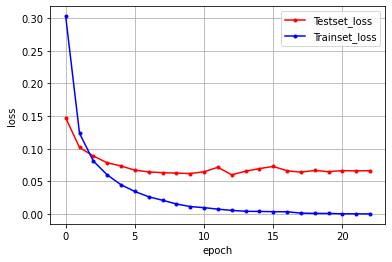

In [73]:
#그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

#그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()